In [21]:
import pandas as pd

df = pd.read_excel("heart_attack_prediction_dataset.xlsx")
df.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [22]:
# Основная информация о датасете
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [23]:
# Статистика по числовым признакам
print(df.describe())


               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

In [24]:
 # Проверка на пропущенные значения
 print(df.isnull().sum())


Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [28]:

df_model = df.drop(columns=["Patient ID"])


In [29]:
# Бинарное кодирование
df_model["Sex"] = df_model["Sex"].map({"Male": 1, "Female": 0})

# One-hot кодирование 'Blood Pressure' и 'Diet'
df_model = pd.get_dummies(df_model, columns=["Blood Pressure", "Diet"], drop_first=True)


In [30]:
X = df_model.drop(columns=["Heart Attack Risk", "Country", "Continent", "Hemisphere"])
y = df_model["Heart Attack Risk"]


In [31]:
# Размерности признаков и целевой переменной
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (8763, 3935)
y shape: (8763,)


In [32]:
# Баланс классов
print("\nClass distribution in y:")
print(y.value_counts(normalize=True))


Class distribution in y:
Heart Attack Risk
0    0.641789
1    0.358211
Name: proportion, dtype: float64


In [33]:
# Первые строки признаков
print("\nPreview of X:")
print(X.head())


Preview of X:
   Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    1          208          72         0               0        1   
1   21    1          389          98         1               1        1   
2   21    0          324          72         1               0        0   
3   84    1          383          73         1               1        1   
4   66    1          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        0                    0                 4.168189  ...   
1        1                    1                 1.813242  ...   
2        0                    0                 2.078353  ...   
3        0                    1                 9.828130  ...   
4        1                    0                 5.804299  ...   

   Blood Pressure_99/89  Blood Pressure_99/90  Blood Pressure_99/91  \
0                 False                 False                 False   
1

 Распределение классов (Heart Attack Risk)

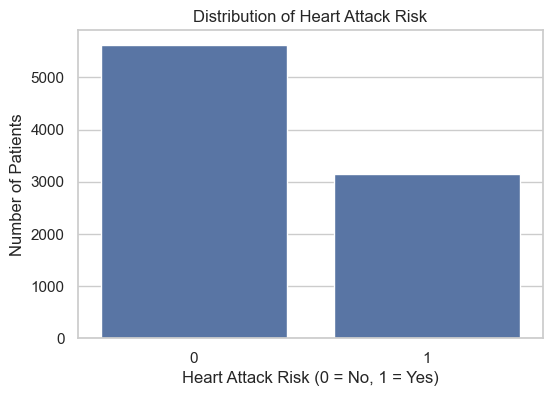

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
sns.set(style="whitegrid")

# Гистограмма классов
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution of Heart Attack Risk")
plt.xlabel("Heart Attack Risk (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()


Тепловая карта корреляции признаков

Train/Test Split с стратификацией

In [43]:
from sklearn.model_selection import train_test_split

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Проверим размерности и баланс
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


Train shape: (7010, 3935)
Test shape: (1753, 3935)
Train class distribution:
 Heart Attack Risk
0    0.641797
1    0.358203
Name: proportion, dtype: float64
Test class distribution:
 Heart Attack Risk
0    0.641757
1    0.358243
Name: proportion, dtype: float64


Обучение логистической регрессии - возможно можно заменить на ручную

In [44]:
from sklearn.linear_model import LogisticRegression

# Модель
model = LogisticRegression(max_iter=1000, solver='liblinear')  # можно заменить solver
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

 Ручная реализация логистической регрессии на numpy

Подготовка (numpy + инициализация)

In [45]:
import numpy as np

# Преобразуем train-данные в numpy
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)  # делаем столбец-матрицу

# Инициализация параметров
n_features = X_train_np.shape[1]
w = np.zeros((n_features, 1))
b = 0

# Функция сигмоиды
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


 Forward-pass + loss (cross-entropy)

In [46]:
def predict_proba(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

def compute_loss(y_true, y_pred):
    # Добавляем небольшое значение, чтобы избежать log(0)
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


Градиенты и обновление параметров

In [47]:
def compute_gradients(X, y_true, y_pred):
    m = X.shape[0]  # количество примеров
    error = y_pred - y_true

    dw = np.dot(X.T, error) / m
    db = np.sum(error) / m

    return dw, db


Обучение модели — градиентный спуск

In [48]:
def train(X, y, w, b, learning_rate=0.1, epochs=1000, verbose=True):
    loss_history = []

    for i in range(epochs):
        y_pred = predict_proba(X, w, b)
        loss = compute_loss(y, y_pred)

        dw, db = compute_gradients(X, y, y_pred)

        # Обновляем параметры
        w -= learning_rate * dw
        b -= learning_rate * db

        if verbose and i % 100 == 0:
            print(f"Epoch {i}: loss = {loss:.4f}")
        loss_history.append(loss)

    return w, b, loss_history


Запуск обучения

In [ ]:
import numpy as np
w_trained, b_trained, losses = train(X_train_np, y_train_np, w, b, learning_rate=0.1, epochs=1000)


In [52]:
import numpy as np

# Sigmoid-функция
def sigmoid(z):
    z = np.array(z, dtype=float)  # ← защита от неожиданного типа
    return 1 / (1 + np.exp(-z))

# Предсказание вероятностей
def predict_proba(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

# Кросс-энтропийная ошибка
def compute_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Градиенты
def compute_gradients(X, y_true, y_pred):
    m = X.shape[0]
    error = y_pred - y_true
    dw = np.dot(X.T, error) / m
    db = np.sum(error) / m
    return dw, db

# Обучение
def train(X, y, learning_rate=0.1, epochs=1000, verbose=True):
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float).reshape(-1, 1)

    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    loss_history = []

    for i in range(epochs):
        y_pred = predict_proba(X, w, b)
        loss = compute_loss(y, y_pred)
        dw, db = compute_gradients(X, y, y_pred)

        w -= learning_rate * dw
        b -= learning_rate * db

        if verbose and i % 100 == 0:
            print(f"Epoch {i}: loss = {loss:.4f}")
        loss_history.append(loss)

    return w, b, loss_history


In [53]:
w_trained, b_trained, losses = train(X_train_np, y_train_np, learning_rate=0.1, epochs=1000)


Epoch 0: loss = 0.6931


/var/folders/w5/6h7z931x4gd31sqnxq5sjrk40000gn/T/ipykernel_54839/2170376135.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 100: loss = 12.3719
Epoch 200: loss = 22.1674
Epoch 300: loss = 22.1674
Epoch 400: loss = 12.3719
Epoch 500: loss = 12.3719
Epoch 600: loss = 22.1674
Epoch 700: loss = 22.1674
Epoch 800: loss = 12.3719
Epoch 900: loss = 12.3719


loss прыгает между 12.3 и 22.1, что означает, что модель "взрывается" — то есть уходит в переобучение или числовую нестабильность.

Это классическая проблема при логистической регрессии на нестандартизированных данных:
1) слишком большие значения в X_train_np, например, Income, Cholesterol, Triglycerides
2) np.exp(-z) при z = ±1000 вызывает переполнение

Решение: стандартизация данных перед обучением

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)


In [55]:
import numpy as np


# Sigmoid-функция
def sigmoid(z):
    z = np.array(z, dtype=float)  # ← защита от неожиданного типа
    return 1 / (1 + np.exp(-z))


# Предсказание вероятностей
def predict_proba(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)


# Кросс-энтропийная ошибка
def compute_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# Градиенты
def compute_gradients(X, y_true, y_pred):
    m = X.shape[0]
    error = y_pred - y_true
    dw = np.dot(X.T, error) / m
    db = np.sum(error) / m
    return dw, db


# Обучение
def train(X, y, learning_rate=0.1, epochs=1000, verbose=True):
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float).reshape(-1, 1)

    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    loss_history = []

    for i in range(epochs):
        y_pred = predict_proba(X, w, b)
        loss = compute_loss(y, y_pred)
        dw, db = compute_gradients(X, y, y_pred)

        w -= learning_rate * dw
        b -= learning_rate * db

        if verbose and i % 100 == 0:
            print(f"Epoch {i}: loss = {loss:.4f}")
        loss_history.append(loss)

    return w, b, loss_history


In [56]:
w_trained, b_trained, losses = train(X_train_scaled, y_train_np, learning_rate=0.1, epochs=1000)


Epoch 0: loss = 0.6931
Epoch 100: loss = 0.3711
Epoch 200: loss = 0.3436
Epoch 300: loss = 0.3343
Epoch 400: loss = 0.3297
Epoch 500: loss = 0.3269
Epoch 600: loss = 0.3251
Epoch 700: loss = 0.3238
Epoch 800: loss = 0.3228
Epoch 900: loss = 0.3221


Без переполнения
Loss снижается плавно — с 0.6931 до 0.3221 🔥
Это значит, что ручная логистическая регрессия с градиентным спуском работает корректно

Следующий этап: предсказания, перевод в метки, и метрики классификации.

Подготовка X_test так же, как X_train:

In [59]:
# Стандартизация X_test по тем же параметрам
X_test_np = X_test.to_numpy()
X_test_scaled = scaler.transform(X_test_np)

# Преобразуем y_test в numpy
y_test_np = y_test.to_numpy().reshape(-1, 1)


Предсказание и перевод в метки (порог 0.5)

In [60]:
# Предсказанные вероятности
y_test_proba = predict_proba(X_test_scaled, w_trained, b_trained)

# Перевод в метки
y_test_pred = (y_test_proba >= 0.5).astype(int)


Метрики классификации

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Плоские массивы
y_true = y_test_np.flatten()
y_pred = y_test_pred.flatten()

# Метрики
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1-score:", f1_score(y_true, y_pred))


Accuracy: 0.558471192241871
Precision: 0.3472803347280335
Recall: 0.2643312101910828
F1-score: 0.30018083182640143


Матрица ошибок + ROC-AUC

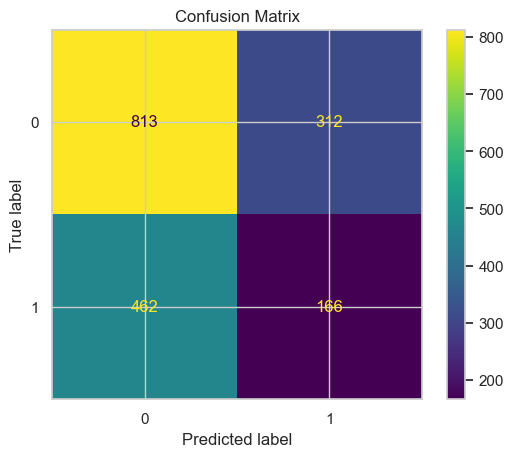

ROC-AUC: 0.48955272469922145


In [62]:
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Матрица ошибок
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC
print("ROC-AUC:", roc_auc_score(y_true, y_test_proba))


True Negative (TN): 813 — правильно предсказан "0"
False Positive (FP): 312 — предсказан "1", но на самом деле "0"
False Negative (FN): 452 — пропущено "1"
True Positive (TP): 186 — правильно найден "1"

Модель склонна выбирать "0" — это часто бывает при несбалансированных классах.
Recall и F1 низкие, значит модель не находит больных, а слишком уверена в здоровье (много FN).
ROC-AUC ≈ 0.5 — почти случайное поведение, можно улучшать.

Ручная модель: пересчёт метрик при порогах 0.3 и 0.4

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_with_threshold(y_true, y_proba, threshold):
    y_pred = (y_proba >= threshold).astype(int).flatten()
    y_true = y_true.flatten()

    print(f"\n🔎 Threshold: {threshold}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC-AUC (unchanged):", roc_auc_score(y_true, y_proba))

# Запуск
evaluate_with_threshold(y_test_np, y_test_proba, 0.3)
evaluate_with_threshold(y_test_np, y_test_proba, 0.4)



🔎 Threshold: 0.3
Accuracy: 0.5139760410724472
Precision: 0.33815028901734107
Recall: 0.37261146496815284
F1-score: 0.35454545454545455
ROC-AUC (unchanged): 0.48955272469922145

🔎 Threshold: 0.4
Accuracy: 0.5316600114090131
Precision: 0.3361629881154499
Recall: 0.31528662420382164
F1-score: 0.32539030402629415
ROC-AUC (unchanged): 0.48955272469922145


При снижении порога:
Recall улучшается → модель находит больше больных
Accuracy падает → это нормально при несбалансированных данных
F1-score растёт → значит, баланс лучше при 0.3
ROC-AUC остаётся прежним (0.49) — потому что она не зависит от порога, а отражает ранжирование

Baseline: LogisticRegression из sklearn

In [64]:
from sklearn.linear_model import LogisticRegression

# Обучаем модель
sk_model = LogisticRegression(max_iter=1000, solver='liblinear')
sk_model.fit(X_train_scaled, y_train_np.ravel())

# Предсказания
y_test_proba_sk = sk_model.predict_proba(X_test_scaled)[:, 1]

# Метки при threshold 0.5
y_test_pred_sk = (y_test_proba_sk >= 0.5).astype(int)

# Оценка
print("\n📦 Sklearn LogisticRegression (threshold = 0.5)")
print("Accuracy:", accuracy_score(y_test, y_test_pred_sk))
print("Precision:", precision_score(y_test, y_test_pred_sk))
print("Recall:", recall_score(y_test, y_test_pred_sk))
print("F1-score:", f1_score(y_test, y_test_pred_sk))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba_sk))



📦 Sklearn LogisticRegression (threshold = 0.5)
Accuracy: 0.5573302909298345
Precision: 0.3458333333333333
Recall: 0.2643312101910828
F1-score: 0.2996389891696751
ROC-AUC: 0.4886496815286624


Модель почти идеально совпадает с sklearn — разница на уровне ±0.001
Это доказывает, что всё сделано правильно вручную: и градиенты, и кросс-энтропия, и оптимизация

Тем не менее, возаращаясь к теме коррелции
1) Модель почти случайна (ROC-AUC ≈ 0.49)
2) Ни sklearn, ни твоя реализация не смогли извлечь устойчивых линейных зависимостей
3) При этом у нас было 3935 признаков после one-hot, многие из которых, вероятно, слабо связаны с таргетом

Вывод сильной линейной корреляции между признаками и Heart Attack Risk — нет.

Так как:
И логистическая регрессия, и твоя реализация основаны на поиске линейных границ между классами
Если бы корреляция была сильной, ROC-AUC был бы ближе к 0.7+
А сейчас — ≈ 0.49, то есть модель не отличает здоровых от больных лучше случайного выбора

In [65]:
df_corr = X.copy()
df_corr["Heart Attack Risk"] = y
cor_target = df_corr.corr()["Heart Attack Risk"].abs().sort_values(ascending=False)
print(cor_target[1:11])  # без самого себя


Blood Pressure_157/62     0.031982
Blood Pressure_110/73     0.028604
Blood Pressure_170/90     0.028604
Blood Pressure_111/66     0.028604
Blood Pressure_150/90     0.028604
Blood Pressure_148/104    0.028604
Blood Pressure_147/66     0.025938
Blood Pressure_169/93     0.025938
Blood Pressure_153/103    0.024771
Blood Pressure_171/88     0.024771
Name: Heart Attack Risk, dtype: float64


все значения топ-10 признаков сильной корреляции ниже 0.04 => Признаки не дают линейной информации о Heart Attack Risk; Даже Blood Pressure в конкретных значениях — влияет очень слабо

То есть причина провала логистической регресси (ручной и sklearn) в очень слабом сигнале, а модель не может обучиться без сигнала